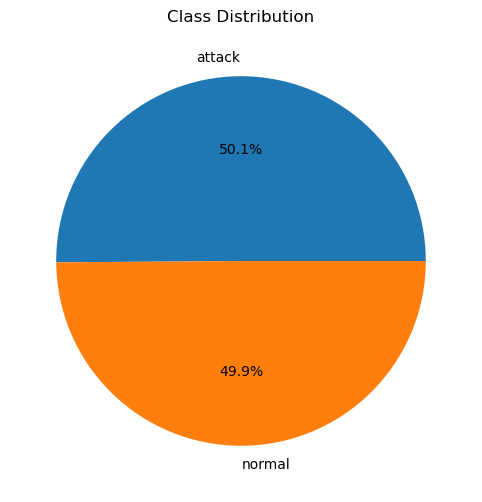

duplicate rec :32
The data has been reduced from 41 features to -> 10 features
Accuracy RF: 0.987119697979125
-----------------------------------------------------
              precision    recall  f1-score   support

      attack       0.99      0.99      0.99      2241
      normal       0.99      0.99      0.99      2262

    accuracy                           0.99      4503
   macro avg       0.99      0.99      0.99      4503
weighted avg       0.99      0.99      0.99      4503



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA

df = pd.read_csv("/kaggle/input/d/kiranmahesh/nslkdd/kdd_test.csv")

(df.head(10))

(df.isnull().sum())

(df.shape)

(df.describe())

(df.columns)

(df["labels"].value_counts())

#Converting labels to binary classification
df.loc[df.labels != 'normal','labels'] = 'attack'
counts = df['labels'].value_counts()

#treating categorical data
categorical_cols = ['protocol_type','service', 'flag']
le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)

#Data imbalancing check by creating a pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Class Distribution')
plt.show()

#Checking duplicates records
print(f"duplicate rec :{df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

X = df.drop('labels', axis = 1)
Y = df['labels']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

# performing PCA
pca = PCA(n_components= 10, random_state=40).fit(X_train)
print(f"The data has been reduced from {X_train.shape[1]} features to -> {len(pca.components_)} features")
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# print(X_train)
# print(X_test)

#training
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

#prediction
Y_pred = rf.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred)

print("Accuracy RF:", accuracy)

print("-----------------------------------------------------")

print(classification_report(Y_test, Y_pred))